In [1]:
##importing a few use case libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\AnushaMacharla\Desktop\Autompg\auto-mpg2.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [3]:
#creating list of column name provided to us in project_description.names
columns_name=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin']

In [4]:
#allocating the name to columns of df
df.columns=columns_name

In [5]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [6]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    int64  
 2   displacement  406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    int64  
 5   acceleration  406 non-null    float64
 6   model year    406 non-null    int64  
 7   origin        406 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.5 KB


In [7]:
df.shape

(406, 8)

In [8]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,406.000000,406.000000,400.000000,406.000000,406.000000,406.000000,406.000000
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704,75.921182,1.568966
std,7.815984,1.712160,104.922458,38.768779,847.004328,2.803359,3.748737,0.797479
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,105.000000,75.750000,2226.500000,13.700000,73.000000,1.000000
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,302.000000,130.000000,3618.250000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [9]:
# Displacement and Horsepower may contain some oultiers

In [10]:
#finding total number of nan values
df.isnull().sum()

mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [11]:
'''##imputing the values with median
median = df['horsepower'].median()
df['horsepower'] = df['horsepower'].fillna(median)'''

"##imputing the values with median\nmedian = df['horsepower'].median()\ndf['horsepower'] = df['horsepower'].fillna(median)"

In [12]:
##handling missing values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
x=imputer.fit_transform(df)
df=pd.DataFrame(x,columns=columns_name)


In [13]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [14]:
df.nunique()

mpg             129
cylinders         5
displacement     83
horsepower       93
weight          356
acceleration     96
model year       13
origin            3
dtype: int64

We will Seperate the continuous and categorical attributes and then remove the mpg from continuous column list

In [15]:
categorical_col=[col for col in df.columns if df[col].nunique()<15]
print(categorical_col)

['cylinders', 'model year', 'origin']


In [16]:
numeric_col=[col for col in df.columns if df[col].nunique()>=15 and df[col].dtype!='object']
numeric_col.remove('mpg')
print(numeric_col)

['displacement', 'horsepower', 'weight', 'acceleration']


# Data Visualization
Univariate Analysis

Continuous Variable


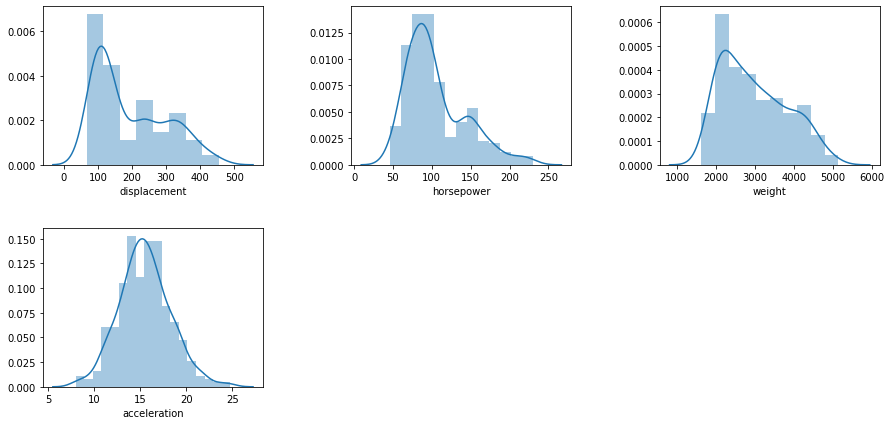

In [17]:
fig=plt.figure(figsize=(15,7))
fig.subplots_adjust(wspace=0.4,hspace=0.4)
for i,col in enumerate(numeric_col):
    ax=fig.add_subplot(2,3,i+1)
    sns.distplot(df[col])

Acceleration is uniformaly distributed.displacement, horsepower and weight are positively Skew.



Categorical Variable

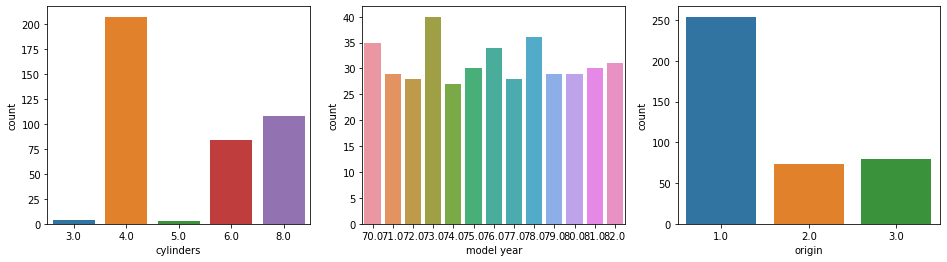

In [18]:
fig=plt.figure(figsize=(16,4))
for i,col in enumerate(categorical_col):
    ax=fig.add_subplot(1,3,i+1)
    sns.countplot(df[col])

Large number of car contain 4 Cylinders,maximum car are of the model year 73 and are from 1 origin



# Bivariate Analysis

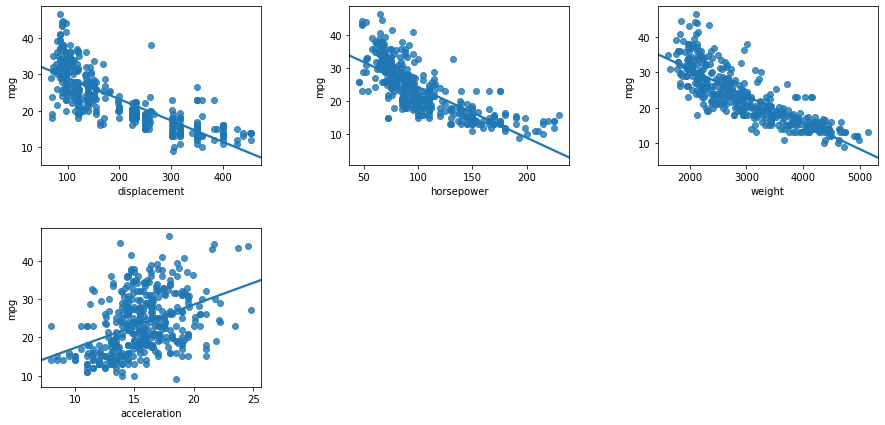

In [19]:
fig=plt.figure(figsize=(15,7))
fig.subplots_adjust(wspace=0.4,hspace=0.4)
for i,col in enumerate(numeric_col):
    ax=fig.add_subplot(2,3,i+1)
    sns.regplot(df[col],df['mpg'],ci=None)

Displacement, Horsepower and Weight shows a good Distribution with MPG and are inversily related with MPG
as value of any of the three incerases the value of MPG goes down and vise-versa as expected these cases in terms 
of car MPG.Acceleration has circular type distribution with mpg as acceleration is uniformally 
distributed as we have seen in univariate analysis and is directly related with MPG as the Acceleration 
increases the MPG also Increases.



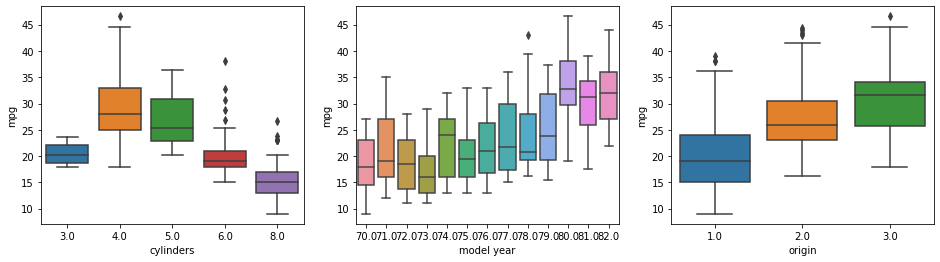

In [20]:
fig=plt.figure(figsize=(16,4))
for i,col in enumerate(categorical_col):
    ax=fig.add_subplot(1,3,i+1)
    sns.boxplot(df[col],df['mpg'])

Car with four Cylinders have highest MPG and with 8 cylinders have the lowest MPG,Cars of model year 80s and car with origin 3 have high MPG



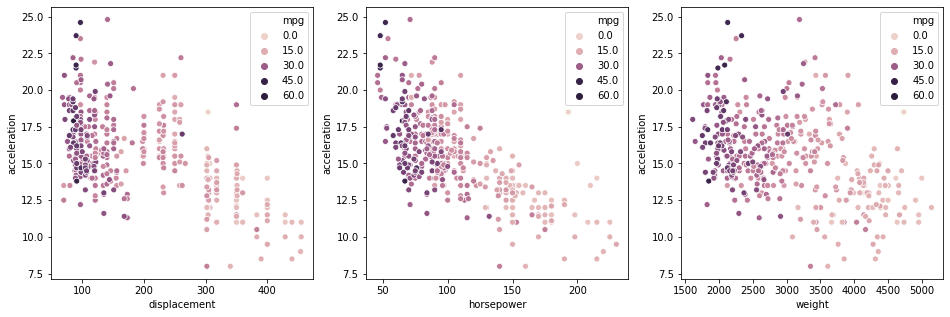

In [21]:
fig=plt.figure(figsize=(16,5))
for i,col in enumerate(['displacement','horsepower','weight']):
    ax=fig.add_subplot(1,3,i+1)
    sns.scatterplot(col,'acceleration',data=df,hue='mpg')

The above plots clearly displays that acceleration in range 12 to 22 with low value of displacement, horsepower, weight gives the highest mpg and as their value increases the MPG goes down.

# Feature Engineering



# Data Cleaning

Removing Outliers

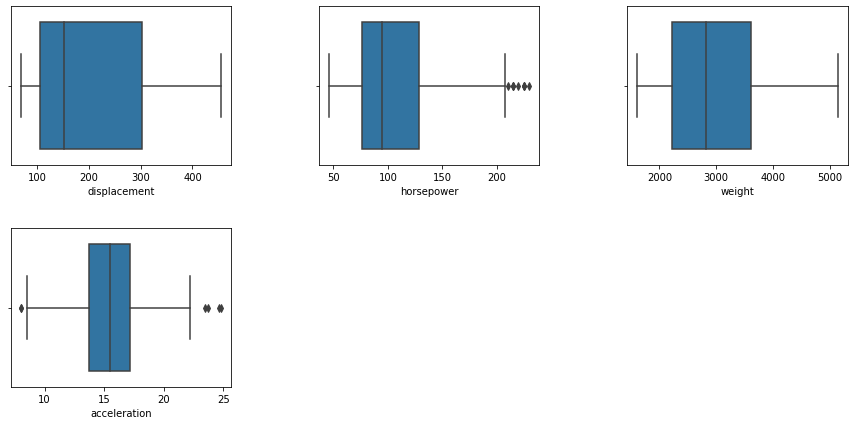

In [22]:
fig=plt.figure(figsize=(15,7))
fig.subplots_adjust(wspace=0.4,hspace=0.4)
for i,col in enumerate(numeric_col):
    ax=fig.add_subplot(2,3,i+1)
    sns.boxplot(df[col])

the boxplot display that horsepower and acceleration contain some outliers we will check using interquartile range of the continuous attributes for outliers

In [23]:
from scipy.stats import iqr

In [24]:
for col in numeric_col:
    temp_df=df[(df[col]>df[col].quantile(0.75)+1.5*iqr(df[col])) | (df[col]<df[col].quantile(0.25)-1.5*iqr(df[col]))]
    if temp_df.shape[0]!=0:
        print(col)
        display(temp_df)
        df.drop(df[(df[col]>df[col].quantile(0.75)+1.5*iqr(df[col])) | (df[col]<df[col].quantile(0.25)-1.5*iqr(df[col]))].index,inplace=True)

horsepower


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
6,14.0,8.0,454.0,220.0,4354.0,9.0,70.0,1.0
7,14.0,8.0,440.0,215.0,4312.0,8.5,70.0,1.0
8,14.0,8.0,455.0,225.0,4425.0,10.0,70.0,1.0
19,14.0,8.0,455.0,225.0,3086.0,10.0,70.0,1.0
31,10.0,8.0,360.0,215.0,4615.0,14.0,70.0,1.0
33,11.0,8.0,318.0,210.0,4382.0,13.5,70.0,1.0
101,13.0,8.0,440.0,215.0,4735.0,11.0,73.0,1.0
102,12.0,8.0,455.0,225.0,4951.0,11.0,73.0,1.0
123,16.0,8.0,400.0,230.0,4278.0,9.5,73.0,1.0


acceleration


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
9,15.0,8.0,390.0,190.0,3850.0,8.5,70.0,1.0
16,14.0,8.0,340.0,160.0,3609.0,8.0,70.0,1.0
17,23.0,8.0,302.0,140.0,3353.0,8.0,70.0,1.0
66,23.0,4.0,97.0,54.0,2254.0,23.5,72.0,2.0
306,27.2,4.0,141.0,71.0,3190.0,24.8,79.0,2.0
333,43.4,4.0,90.0,48.0,2335.0,23.7,80.0,2.0
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0


Above result shows that horsepower and acceleration contain outliers so we will remove them as they are less in numbeR

In [25]:
#df.drop(df[(df[col]>df[col].quantile(0.75)+1.5*iqr(df[col])) | (df[col]<df[col].quantile(0.25)-1.5*iqr(df[col]))].index,inplace=True)

In [26]:
for col in numeric_col:
    temp_df=df[(df[col]>df[col].quantile(0.75)+1.5*iqr(df[col])) | (df[col]<df[col].quantile(0.25)-1.5*iqr(df[col]))]
    if temp_df.shape[0]!=0:
        print(col)
        display(temp_df)

horsepower


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
5,15.0,8.0,429.0,198.0,4341.0,10.0,70.0,1.0
32,10.0,8.0,307.0,200.0,4376.0,15.0,70.0,1.0
34,9.0,8.0,304.0,193.0,4732.0,18.5,70.0,1.0
74,11.0,8.0,429.0,208.0,4633.0,11.0,72.0,1.0
77,13.0,8.0,400.0,190.0,4422.0,12.5,72.0,1.0
97,12.0,8.0,429.0,198.0,4952.0,11.5,73.0,1.0
238,15.5,8.0,400.0,190.0,4325.0,12.2,77.0,1.0


acceleration


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
202,29.0,4.0,85.0,52.0,2035.0,22.2,76.0,1.0
203,24.5,4.0,98.0,60.0,2164.0,22.1,76.0,1.0
307,23.9,8.0,260.0,90.0,3420.0,22.2,79.0,1.0


In [27]:
df.reset_index(drop=True,inplace=True)

In [28]:
df.drop_duplicates(inplace=True)

In [29]:
df.shape

(390, 8)

# Finding correlation Among Attributes

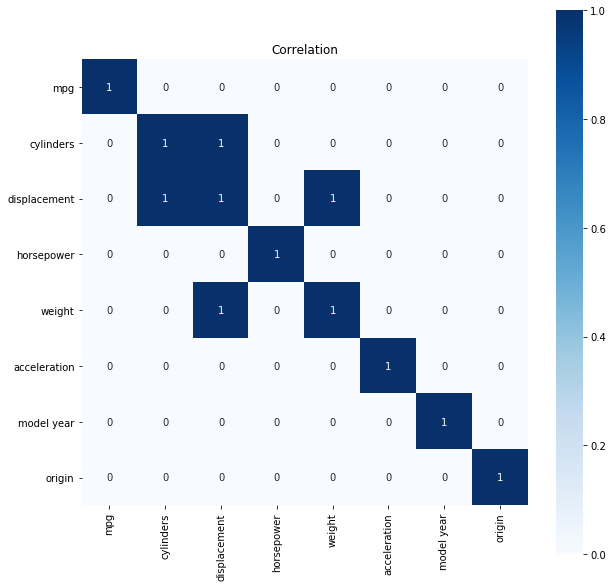

In [30]:
corr=df.corr()
plt.figure(figsize=(10,10))
plt.title('Correlation')
sns.heatmap(corr > 0.90, annot=True, square=True,cmap='Blues')

the above heatmap shows that

cylinder and displacement

displacement and weight are highly correlated



In [31]:
corr['mpg'].sort_values(ascending=False)

mpg             1.000000
origin          0.556327
model year      0.541527
acceleration    0.358266
cylinders      -0.756869
horsepower     -0.767269
displacement   -0.791288
weight         -0.823609
Name: mpg, dtype: float64

In case of cylinder and displacement cylinder is having less value of correlation and in case of weight

and displacement, weight is having high correlation as compaired to displacement so if we will remove cylinder from
first case and displacement from second case we will loose two attributes so we will remove the displacement which
is common for both

In [32]:
df.drop('displacement',axis=1,inplace=True)

# Scaling

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:

scaler=StandardScaler()

In [35]:
scaled_df=scaler.fit_transform(df)

In [36]:
scaled_df=pd.DataFrame(scaled_df,columns=df.columns)

In [37]:
scaled_df.head()

,mpg,cylinders,horsepower,weight,acceleration,model year,origin
0,-0.751982,1.540128,0.808498,0.670389,-1.426233,-1.648384,-0.722838
1,-1.149156,1.540128,1.831107,0.898339,-1.624406,-1.648384,-0.722838
2,-0.751982,1.540128,1.392846,0.588375,-1.822579,-1.648384,-0.722838
3,-1.016765,1.540128,1.392846,0.584757,-1.426233,-1.648384,-0.722838
4,-0.884373,1.540128,1.100672,0.604054,-2.020751,-1.648384,-0.722838


# Model Development


In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [39]:
x=df.drop('mpg',axis=1)
y=df.mpg

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)

# Linear Regression

In [41]:
lm=LinearRegression()

In [42]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:

yhat=lm.predict(x_test)

In [44]:
mean_squared_error(y_test,yhat)

10.880639117152827

In [45]:
lm.score(x_train,y_train)

0.7895696017718296

In [46]:
lm.score(x_test,y_test)

0.8014145798120144

In [47]:
from sklearn.metrics import r2_score,mean_squared_error
print('mean squared error for model 1 is ',mean_squared_error(yhat,y_test))
print('Root mean squared error for model 1 is',np.sqrt(mean_squared_error(yhat,y_test)))
print('r2 - score for model 1 is',r2_score(y_test,yhat))

mean squared error for model 1 is  10.880639117152827
Root mean squared error for model 1 is 3.298581379495256
r2 - score for model 1 is 0.8014145798120144


In [48]:
cross_val_score(lm,x,y).mean()

0.5242527518602018

Text(0.5, 0, 'MPG')

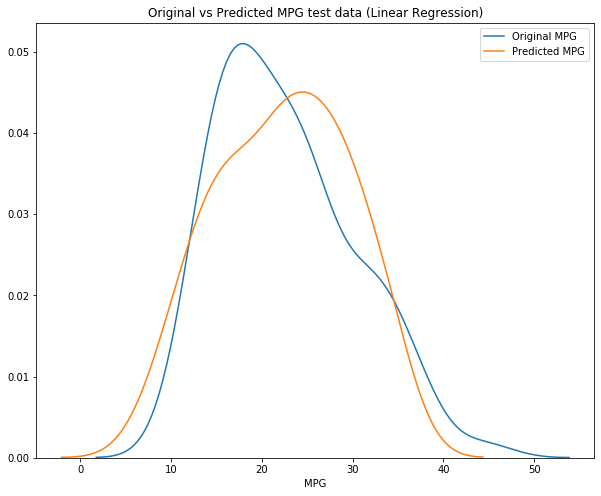

In [49]:
plt.figure(figsize=(10,8))
sns.distplot(y_test,hist=False,label="Original MPG")
sns.distplot(yhat,hist=False,label="Predicted MPG")
plt.title("Original vs Predicted MPG test data (Linear Regression)")
plt.xlabel("MPG")

In [50]:
# import packages
from sklearn.linear_model import Lasso

# Code starts here

# instantiate lasso model
lasso = Lasso()

# fit and predict
lasso.fit(x_train,y_train)
lasso_pred = lasso.predict(x_test)

# calculate RMSE
lasso_rmse = np.sqrt(mean_squared_error(lasso_pred,y_test))
print('lasso rmse is ', lasso_rmse)

# calculate Rscore
lasso_rscore = r2_score(y_test,lasso_pred)
print('lasso r2 score is ', lasso_rscore)

# check how many feature coefficients are zero
zero_features_lasso = len(lasso.coef_ == 0) - 1
print('no of zero features', zero_features_lasso)

# Code ends here
print(lasso.coef_)
print(lasso.score(x_train,y_train))
lasso.score(x_test,y_test)

lasso rmse is  3.5280672539014337
lasso r2 score is  0.7728217945344245
no of zero features 5
[ 0.         -0.01593142 -0.0063737   0.          0.5828307   0.        ]
0.7815414053427259


0.7728217945344245

In [51]:
# import packages
from sklearn.linear_model import Ridge

# Code starts here

# instantiate lasso model
ridge = Ridge()

# fit and predict
ridge.fit(x_train,y_train)
ridge_pred = ridge.predict(x_test)

# calculate RMSE
ridge_rmse = np.sqrt(mean_squared_error(ridge_pred,y_test))
print('Ridge rmse is ', ridge_rmse)

# calculate Rscore
ridge_rscore = r2_score(y_test,ridge_pred)
print('Ridge r2 score is ', ridge_rscore)

# check how many feature coefficients are zero
zero_features_ridge = len(ridge.coef_ == 0) - 1
print('no of zero features', zero_features_ridge)
# Code ends here
print(ridge.coef_)
print(ridge.score(x_train,y_train))
ridge.score(x_test,y_test)

Ridge rmse is  3.299780570897104
Ridge r2 score is  0.8012701630528174
no of zero features 5
[ 0.25669561 -0.02614846 -0.00586023 -0.01676731  0.67026937  0.91795606]
0.7895691891024021


0.8012701630528174

# Polynomial Regression

In [52]:
from sklearn.preprocessing import PolynomialFeatures

# 
Let's explore some of the feature for polynomal fit


In [53]:
x1=df['weight']
y1=df['mpg']
f=np.polyfit(x1,y1,2)
p=np.poly1d(f)
p

poly1d([ 1.68238307e-06, -1.81690036e-02,  6.14659004e+01])

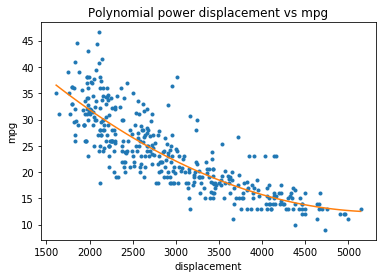

In [54]:
x_new=np.linspace(df['weight'].min(),df['weight'].max(),100)
#polynomial values of degree 2 of the new values
y_new=p(x_new)
plt.plot(x1,y1,'.',x_new,y_new,'-')
plt.title("Polynomial power displacement vs mpg")
plt.xlabel("displacement")
plt.ylabel("mpg")
plt.show()

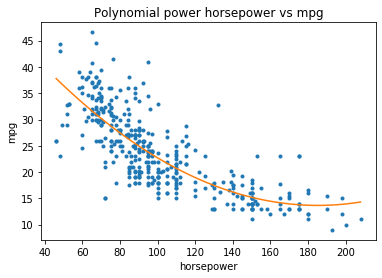

In [55]:
x2=df['horsepower']
y2=df['mpg']
f=np.polyfit(x2,y2,2)
p=np.poly1d(f)
x_new=np.linspace(df['horsepower'].max(),df['horsepower'].min(),100)
y_new=p(x_new)
plt.plot(x2,y2,'.',x_new,y_new,'-')
plt.title("Polynomial power horsepower vs mpg")
plt.xlabel("horsepower")
plt.ylabel("mpg")
plt.show()


the above graphs shows that polynomial line fit more accuratly in the data so we will apply the polynomial regression of degree 2 and chack weather it is better then linear regression

In [56]:
X=df.drop('mpg',axis=1)
Y=df.mpg

In [57]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=100)

In [58]:
polynomial_features=PolynomialFeatures(degree=2)

In [59]:
X_train=polynomial_features.fit_transform(X_train)
X_test=polynomial_features.fit_transform(X_test)

In [60]:
lm_poly=LinearRegression()

In [61]:

lm_poly.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:

yhat_poly=lm_poly.predict(X_test)

In [63]:
mean_squared_error(Y_test,yhat_poly)



9.619621564035162

In [93]:
lm_poly.score(X_train,Y_train)

0.8839009468553848

In [64]:

lm_poly.score(X_test,Y_test)

0.7886773068780337

In [65]:
from sklearn.metrics import r2_score,mean_squared_error
print('mean squared error for model 1 is ',mean_squared_error(yhat_poly,Y_test))
print('Root mean squared error for model 1 is',np.sqrt(mean_squared_error(yhat_poly,Y_test)))
print('r2 - score for model 1 is',r2_score(Y_test,yhat_poly))

mean squared error for model 1 is  9.619621564035162
Root mean squared error for model 1 is 3.1015514769281456
r2 - score for model 1 is 0.7886773068780337


In [66]:
cross_val_score(lm_poly,polynomial_features.fit_transform(X),Y).mean()

-0.07985843283282865

Text(0.5, 0, 'MPG')

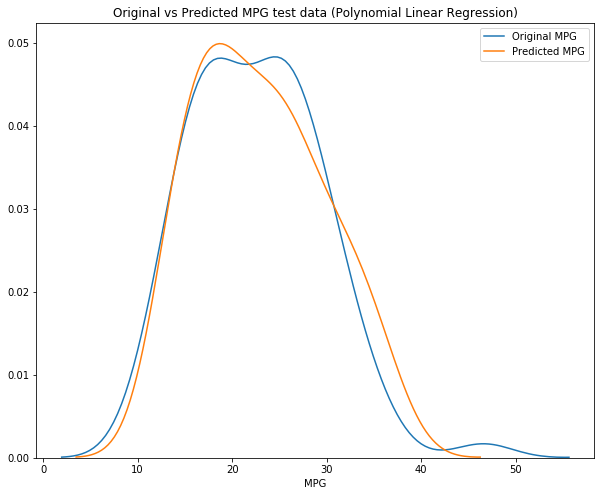

In [67]:
plt.figure(figsize=(10,8))
sns.distplot(Y_test,hist=False,label="Original MPG")
sns.distplot(yhat_poly,hist=False,label="Predicted MPG")
plt.title("Original vs Predicted MPG test data (Polynomial Linear Regression)")
plt.xlabel("MPG")


After looking at the scores like accuracy score ,mean squared error and cross validation score we can conclude that polynomial regression has a little edge on accuracy score but cross validation score and mean squared score of linear regression are much better then that of polynomial regression so we conclude that linear regression fit the data much better as compair to polynomial regression


In [68]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train,y_train)
ypred=tree_reg.predict(x_test)

In [69]:
%%time
scores = cross_val_score(tree_reg, 
                         X, 
                         Y, 
                         scoring="neg_mean_squared_error", 
                         cv = 10)
tree_reg_rmse_scores = np.sqrt(-scores)
tree_reg_rmse_scores
tree_reg_rmse_scores.mean()

Wall time: 47.8 ms


3.8750346334773953

In [70]:
from sklearn.metrics import r2_score,mean_squared_error
print('mean squared error for model 1 is ',mean_squared_error(ypred,y_test))
print('Root mean squared error for model 1 is',np.sqrt(mean_squared_error(ypred,y_test)))
print('r2 - score for model 1 is',r2_score(y_test,ypred))

mean squared error for model 1 is  13.350256410256412
Root mean squared error for model 1 is 3.653800269617431
r2 - score for model 1 is 0.756340941896632


In [71]:
print(tree_reg.score(x_train,y_train))
tree_reg.score(x_test,y_test)

1.0


0.756340941896632

Text(0.5, 0, 'MPG')

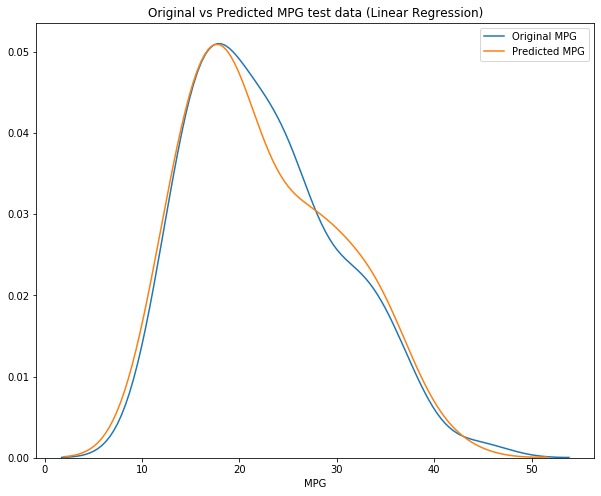

In [72]:
plt.figure(figsize=(10,8))
sns.distplot(y_test,hist=False,label="Original MPG")
sns.distplot(ypred,hist=False,label="Predicted MPG")
plt.title("Original vs Predicted MPG test data (Linear Regression)")
plt.xlabel("MPG")

In [73]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(x_train,y_train)
ypred1=tree_reg.predict(x_test)

In [74]:
print(forest_reg.score(x_train,y_train))
forest_reg.score(x_test,y_test)

0.9781585341708667


0.8408208976796145

In [75]:
from sklearn.metrics import r2_score,mean_squared_error
print('mean squared error for model 1 is ',mean_squared_error(ypred1,y_test))
print('Root mean squared error for model 1 is',np.sqrt(mean_squared_error(ypred1,y_test)))
print('r2 - score for model 1 is',r2_score(y_test,ypred1))

mean squared error for model 1 is  13.350256410256412
Root mean squared error for model 1 is 3.653800269617431
r2 - score for model 1 is 0.756340941896632


In [76]:
%%time
forest_reg_cv_scores = cross_val_score(forest_reg,
                                         X,
                                         Y,
                                         scoring='neg_mean_squared_error',
                                         cv = 10)

forest_reg_rmse_scores = np.sqrt(-forest_reg_cv_scores)
forest_reg_rmse_scores.mean()

Wall time: 1.43 s


3.027281800729452

Text(0.5, 0, 'MPG')

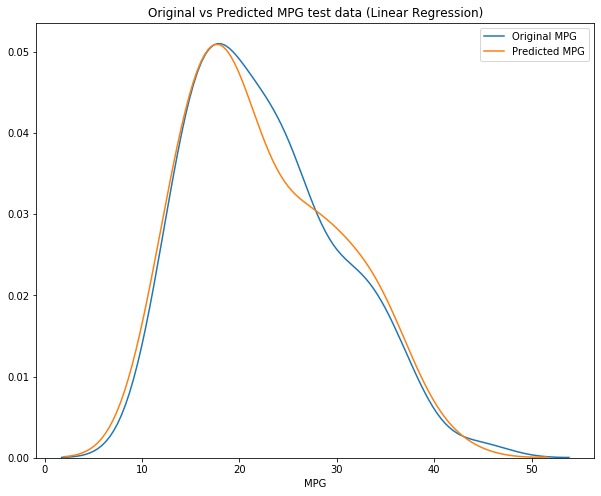

In [77]:
plt.figure(figsize=(10,8))
sns.distplot(y_test,hist=False,label="Original MPG")
sns.distplot(ypred1,hist=False,label="Predicted MPG")
plt.title("Original vs Predicted MPG test data (Linear Regression)")
plt.xlabel("MPG")

In [78]:
from sklearn.svm import SVR

svm_reg = RandomForestRegressor()
svm_reg.fit(x_train,y_train)
ypred1=tree_reg.predict(x_test)

In [79]:
print(svm_reg.score(x_train,y_train))
svm_reg.score(x_test,y_test)

0.978802222137394


0.841248139887481

In [80]:
from sklearn.metrics import r2_score,mean_squared_error
print('mean squared error for model 1 is ',mean_squared_error(ypred1,y_test))
print('Root mean squared error for model 1 is',np.sqrt(mean_squared_error(ypred1,y_test)))
print('r2 - score for model 1 is',r2_score(y_test,ypred1))

mean squared error for model 1 is  13.350256410256412
Root mean squared error for model 1 is 3.653800269617431
r2 - score for model 1 is 0.756340941896632


In [81]:
%%time
from sklearn.svm import SVR

svm_reg = SVR(kernel='linear')
svm_reg.fit(x_train, y_train)
y_pred2=svm_reg.predict(x_test)
svm_cv_scores = cross_val_score(svm_reg, X, Y,
                                scoring='neg_mean_squared_error',
                                cv = 10)
svm_rmse_scores = np.sqrt(-svm_cv_scores)
svm_rmse_scores.mean()

Wall time: 2min 10s


5.425674948599164

Text(0.5, 0, 'MPG')

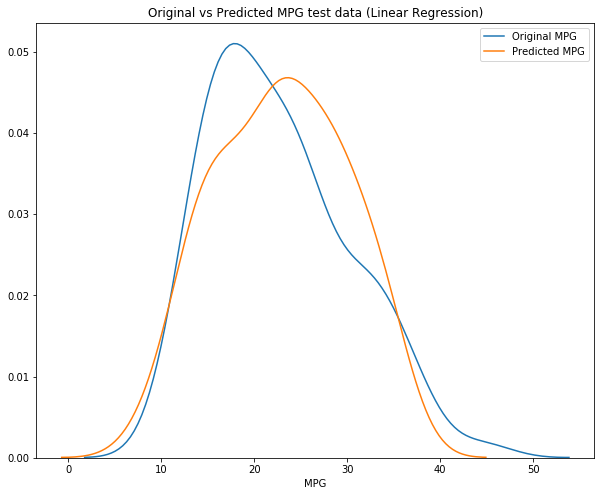

In [82]:
plt.figure(figsize=(10,8))
sns.distplot(y_test,hist=False,label="Original MPG")
sns.distplot(y_pred2,hist=False,label="Predicted MPG")
plt.title("Original vs Predicted MPG test data (Linear Regression)")
plt.xlabel("MPG")

In [83]:
print(svm_reg.score(x_train,y_train))
svm_reg.score(x_test,y_test)

0.7717678394949848


0.8073290109311959

In [90]:
import pickle
# Saving model to disk
pickle.dump(lm, open('model1.pkl','wb'))

# Loading model to compare the results
model = pickle.load(open('model1.pkl','rb'))


In [91]:
int_features = [int(x) for x in [8,130.0,3504,12.0,70,1]]
final_features = [np.array(int_features)]
prediction = lm.predict(final_features)
output = round(prediction[0], 2)

In [92]:
output

15.76